# Importing Libraries

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")
from wordcloud import WordCloud, ImageColorGenerator
import re
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package wordnet to C:\Users\Premier
[nltk_data]     UK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Premier
[nltk_data]     UK\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Reading CSV File

In [3]:
df=pd.read_csv("amazon_product_reviews_page1.csv")

In [4]:
df

,product_image,product_title,asin,product_rating,product_store,customer_name,review_title,review_date,review_text,product_url
0,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Kirsty Perkins,5.0 out of 5 stars\nLovely containers,5 December 2023,"Great containers, nice and air tight too. Fast...",https://www.amazon.co.uk/Premier-Housewares-Li...
1,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Lord Hayder,5.0 out of 5 stars\nThank you,7 January 2024,"This item was beautiful, thanks",https://www.amazon.co.uk/Premier-Housewares-Li...
2,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Irene.paget,4.0 out of 5 stars\nUtensils holder,3 November 2023,"This is a sturdy container, I find it very sui...",https://www.amazon.co.uk/Premier-Housewares-Li...
3,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Debbie Banks,"5.0 out of 5 stars\nLovely canisters,",19 July 2023,"Boyght these to change decor in kitchen, lovel...",https://www.amazon.co.uk/Premier-Housewares-Li...
4,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Christine Bunclark,5.0 out of 5 stars\nGreat,12 March 2024,Fits perfectly in my kitchen and looks good.,https://www.amazon.co.uk/Premier-Housewares-Li...
...,...,...,...,...,...,...,...,...,...,...
2979,https://m.media-amazon.com/images/I/71eI2S6MHC...,"Premier Housewares Clothes Valet, Rubberwood/S...",B00562MBU4,4.5,Premier Store,Vivien,5.0 out of 5 stars\nexcellent,25 February 2014,I brought this item to encourage my husband to...,https://www.amazon.co.uk/Premier-Housewares-Cl...
2980,https://m.media-amazon.com/images/I/71eI2S6MHC...,"Premier Housewares Clothes Valet, Rubberwood/S...",B00562MBU4,4.5,Premier Store,Gigi,1.0 out of 5 stars\n... hanger don't stick or ...,23 April 2017,The top of the hanger don't stick or stay in n...,https://www.amazon.co.uk/Premier-Housewares-Cl...
2981,https://m.media-amazon.com/images/I/71eI2S6MHC...,"Premier Housewares Clothes Valet, Rubberwood/S...",B00562MBU4,4.5,Premier Store,Amazon Customer,5.0 out of 5 stars\nFive Stars,13 January 2017,Good Quality & arrived as said prior to Xmas,https://www.amazon.co.uk/Premier-Housewares-Cl...
2982,https://m.media-amazon.com/images/I/71qyQXnBn+...,Premier Housewares Bread Proofing Basket with ...,B0B6HV8PVP,3.0,Premier Store,Anonymous,1.0 out of 5 stars\nPoooor quality- sold as “p...,24 March 2024,Not good returning as soon as received.1. Not ...,https://www.amazon.co.uk/Premier-Housewares-Li...


# Exploratory Data Analysis

<Axes: >

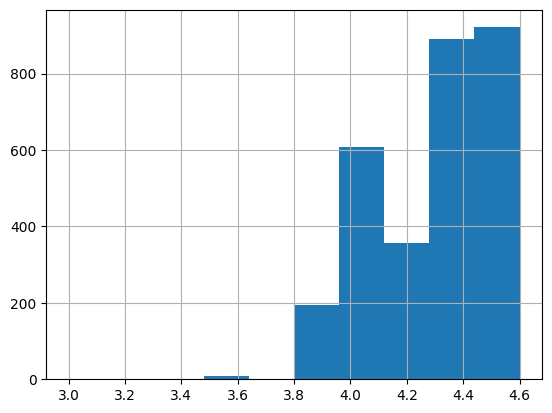

In [35]:
df['product_rating'].hist()

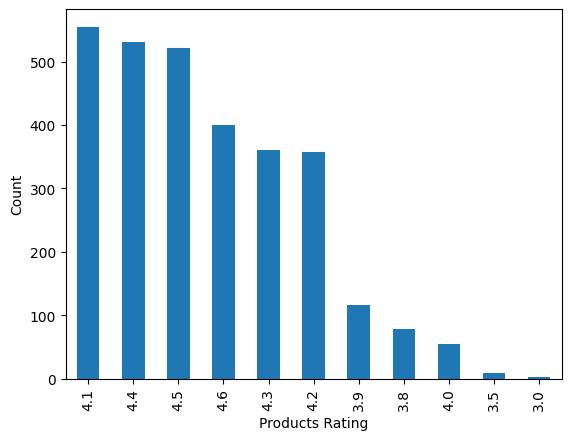

In [53]:
df['product_rating'].value_counts().plot.bar()
#plt.title('Product Rating')
plt.xlabel('Products Rating')
plt.ylabel('Count')
plt.show()

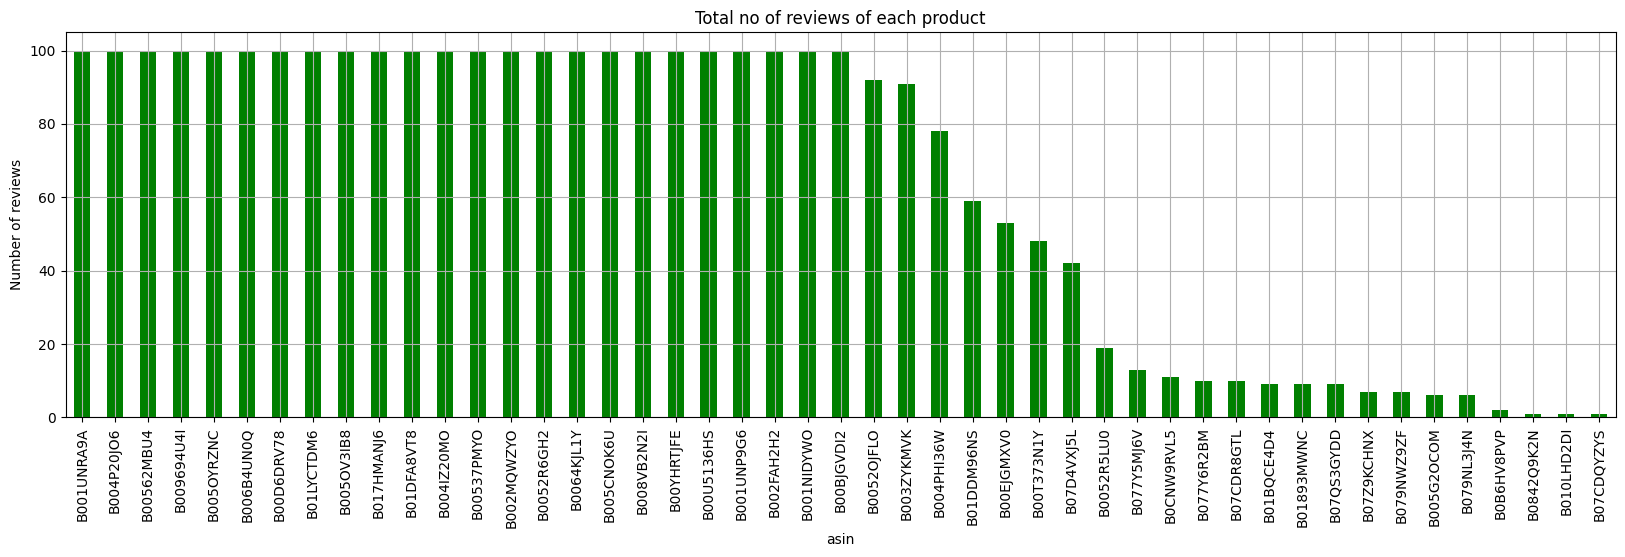

In [465]:
df['asin'].value_counts().plot(color='green', kind='bar', figsize=(20,5),grid=True)
plt.title('Total no of reviews of each product')
plt.ylabel('Number of reviews')
plt.show()

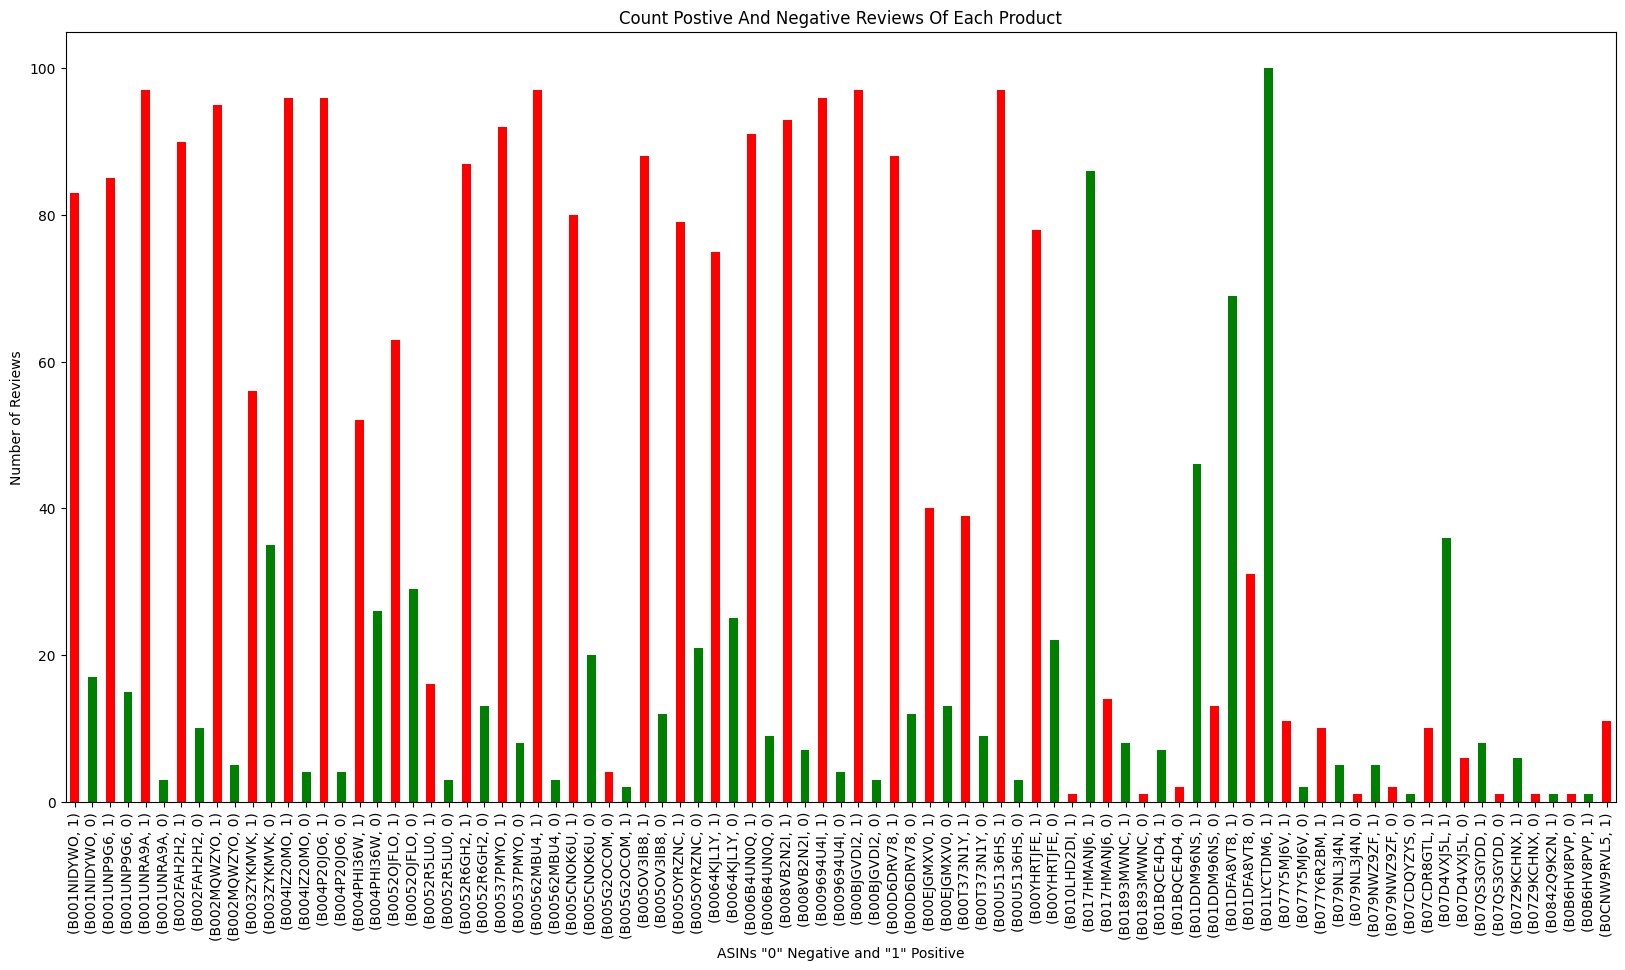

In [487]:
df.groupby('asin')['feedback'].value_counts().plot(kind='bar',stacked=True,color=('red','green'),figsize=(20,10))
plt.title('Count Postive And Negative Reviews Of Each Product')
plt.ylabel('Number of Reviews')
plt.xlabel('ASINs "0" Negative and "1" Positive')
plt.show()

In [13]:
df['cust_rating']=df['review_title'].str.slice(0,3)

In [20]:
df['cust_rating']=df['cust_rating'].astype(float)

In [22]:
df['feedback']=np.where(df['cust_rating']>=3.0,1,0)

In [23]:
df

,product_image,product_title,asin,product_rating,product_store,customer_name,review_title,review_date,review_text,product_url,cust_rating,feedback
0,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Kirsty Perkins,5.0 out of 5 stars\nLovely containers,5 December 2023,"Great containers, nice and air tight too. Fast...",https://www.amazon.co.uk/Premier-Housewares-Li...,5.0,1
1,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Lord Hayder,5.0 out of 5 stars\nThank you,7 January 2024,"This item was beautiful, thanks",https://www.amazon.co.uk/Premier-Housewares-Li...,5.0,1
2,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Irene.paget,4.0 out of 5 stars\nUtensils holder,3 November 2023,"This is a sturdy container, I find it very sui...",https://www.amazon.co.uk/Premier-Housewares-Li...,4.0,1
3,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Debbie Banks,"5.0 out of 5 stars\nLovely canisters,",19 July 2023,"Boyght these to change decor in kitchen, lovel...",https://www.amazon.co.uk/Premier-Housewares-Li...,5.0,1
4,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Christine Bunclark,5.0 out of 5 stars\nGreat,12 March 2024,Fits perfectly in my kitchen and looks good.,https://www.amazon.co.uk/Premier-Housewares-Li...,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2979,https://m.media-amazon.com/images/I/71eI2S6MHC...,"Premier Housewares Clothes Valet, Rubberwood/S...",B00562MBU4,4.5,Premier Store,Vivien,5.0 out of 5 stars\nexcellent,25 February 2014,I brought this item to encourage my husband to...,https://www.amazon.co.uk/Premier-Housewares-Cl...,5.0,1
2980,https://m.media-amazon.com/images/I/71eI2S6MHC...,"Premier Housewares Clothes Valet, Rubberwood/S...",B00562MBU4,4.5,Premier Store,Gigi,1.0 out of 5 stars\n... hanger don't stick or ...,23 April 2017,The top of the hanger don't stick or stay in n...,https://www.amazon.co.uk/Premier-Housewares-Cl...,1.0,0
2981,https://m.media-amazon.com/images/I/71eI2S6MHC...,"Premier Housewares Clothes Valet, Rubberwood/S...",B00562MBU4,4.5,Premier Store,Amazon Customer,5.0 out of 5 stars\nFive Stars,13 January 2017,Good Quality & arrived as said prior to Xmas,https://www.amazon.co.uk/Premier-Housewares-Cl...,5.0,1
2982,https://m.media-amazon.com/images/I/71qyQXnBn+...,Premier Housewares Bread Proofing Basket with ...,B0B6HV8PVP,3.0,Premier Store,Anonymous,1.0 out of 5 stars\nPoooor quality- sold as “p...,24 March 2024,Not good returning as soon as received.1. Not ...,https://www.amazon.co.uk/Premier-Housewares-Li...,1.0,0


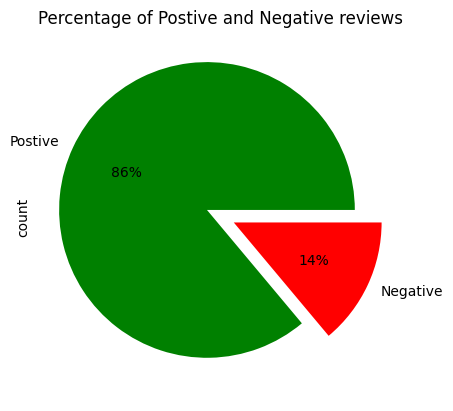

In [65]:
df['feedback'].value_counts().plot(kind='pie', explode=(0.1,0.1),labels=('Postive','Negative'),colors=('Green','Red'),autopct='%1.0f%%')
plt.title('Percentage of Postive and Negative reviews')
plt.show()


In [24]:
df['feedback'].value_counts()

feedback
1    2569
0     415
Name: count, dtype: int64

# Products with most Negative Reviews

In [354]:
most_neg=df[df['feedback']==0]['asin'].value_counts()
total_rev=df['asin'].value_counts()

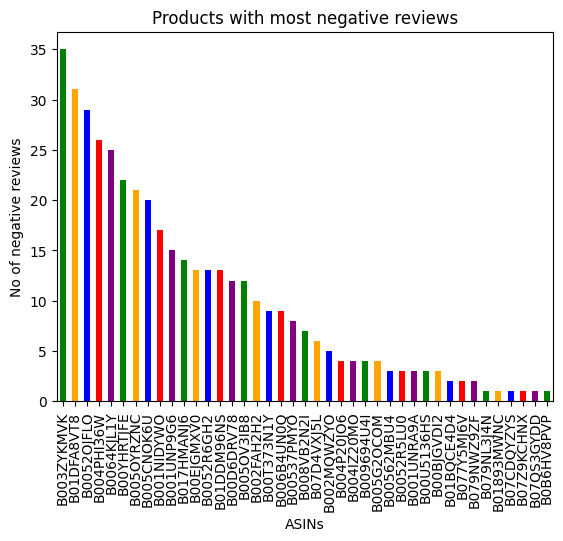

In [394]:
df[df['feedback']==0]['asin'].value_counts().plot(kind='bar',color=('green','orange','blue','red','purple'))
plt.title('Products with most negative reviews')
plt.ylabel('No of negative reviews')
plt.xlabel('ASINs')
plt.show()

In [346]:
df[df['asin']=='B01BQCE4D4']

,product_image,product_title,asin,product_rating,product_store,customer_name,review_title,review_date,review_text,product_url,cust_rating,feedback
1862,https://m.media-amazon.com/images/I/81e-O7oKjx...,Premier Housewares Narrow Chinese Oak Slim Mou...,B01BQCE4D4,3.5,Premier Store,A. V.B.,5.0 out of 5 stars\nGood quality console table!,2 November 2021,"I was very impressed with the quality, so easy...",https://www.amazon.co.uk/Premier-Housewares-He...,5.0,1
1863,https://m.media-amazon.com/images/I/81e-O7oKjx...,Premier Housewares Narrow Chinese Oak Slim Mou...,B01BQCE4D4,3.5,Premier Store,YLB L.,3.0 out of 5 stars\nArrived broken,25 February 2024,"Easy to build, nice piece of furniture, unfort...",https://www.amazon.co.uk/Premier-Housewares-He...,3.0,1
1864,https://m.media-amazon.com/images/I/81e-O7oKjx...,Premier Housewares Narrow Chinese Oak Slim Mou...,B01BQCE4D4,3.5,Premier Store,Rachael McEgan,1.0 out of 5 stars\nArrived broken,16 January 2023,"Item arrived broken, along with numerous chips...",https://www.amazon.co.uk/Premier-Housewares-He...,1.0,0
1865,https://m.media-amazon.com/images/I/81e-O7oKjx...,Premier Housewares Narrow Chinese Oak Slim Mou...,B01BQCE4D4,3.5,Premier Store,Ollie nana,5.0 out of 5 stars\nA lovely piece of furnitur...,28 January 2022,nan,https://www.amazon.co.uk/Premier-Housewares-He...,5.0,1
1866,https://m.media-amazon.com/images/I/81e-O7oKjx...,Premier Housewares Narrow Chinese Oak Slim Mou...,B01BQCE4D4,3.5,Premier Store,Lisa,3.0 out of 5 stars\nTable not Grey as described,20 October 2022,Table arrived and when taken from the box it w...,https://www.amazon.co.uk/Premier-Housewares-He...,3.0,1
1867,https://m.media-amazon.com/images/I/81e-O7oKjx...,Premier Housewares Narrow Chinese Oak Slim Mou...,B01BQCE4D4,3.5,Premier Store,SNisbeth,4.0 out of 5 stars\nNot perfect but does that job,4 August 2017,Nice and light easy to put together. Love the ...,https://www.amazon.co.uk/Premier-Housewares-He...,4.0,1
1868,https://m.media-amazon.com/images/I/81e-O7oKjx...,Premier Housewares Narrow Chinese Oak Slim Mou...,B01BQCE4D4,3.5,Premier Store,Mrs Lois Sharma,5.0 out of 5 stars\nEasy to assemble. Good value,28 September 2021,nan,https://www.amazon.co.uk/Premier-Housewares-He...,5.0,1
1869,https://m.media-amazon.com/images/I/81e-O7oKjx...,Premier Housewares Narrow Chinese Oak Slim Mou...,B01BQCE4D4,3.5,Premier Store,Bathlass,5.0 out of 5 stars\nFive Stars,20 December 2017,"Great value, good looking sturdy console table",https://www.amazon.co.uk/Premier-Housewares-He...,5.0,1
1870,https://m.media-amazon.com/images/I/81e-O7oKjx...,Premier Housewares Narrow Chinese Oak Slim Mou...,B01BQCE4D4,3.5,Premier Store,Amazon Customer,1.0 out of 5 stars\nDamaged item,26 October 2017,The item was damaged when delivered. The damag...,https://www.amazon.co.uk/Premier-Housewares-He...,1.0,0


# Word Cloud of Negative Reviews

In [216]:
negative_reviews=df[df['feedback']==0]

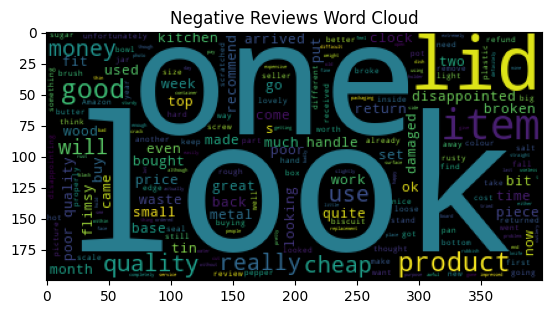

In [225]:
negative_joined_reviews=' '.join(negative_reviews['review_text'])
plt.imshow(wc.generate(negative_joined_reviews))
plt.title('Negative Reviews Word Cloud')
plt.show()

# Word Cloud of Positive Reviews

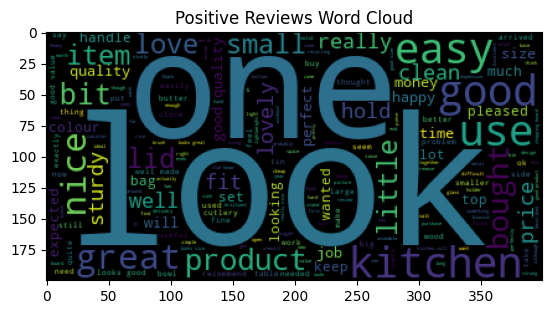

In [224]:
positive_reviews=df[df['feedback']==1]
positive_joined_reviews=' '.join(positive_reviews['review_text'])
plt.imshow(wc.generate(positive_joined_reviews))
plt.title('Positive Reviews Word Cloud')
plt.show()

# Word Cloud of All Reviews

In [213]:
joined_reviews=' '.join([word for word in df['review_text']])

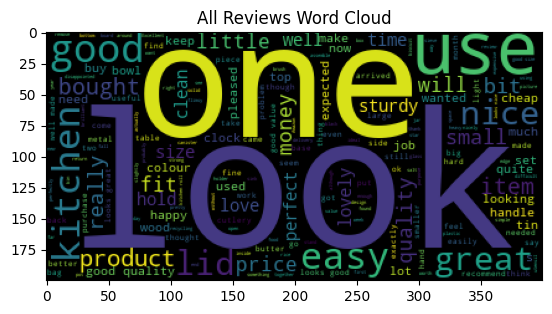

In [223]:
wc=WordCloud(background_color='black')
plt.imshow(wc.generate(joined_reviews))
plt.title('All Reviews Word Cloud')
plt.show()

# Separating Features and Target Variables

In [281]:
X= df.drop('feedback', axis=1)
y= df['feedback']

# Balancing Imbalanced Data

In [282]:
sampler= RandomOverSampler(sampling_strategy='minority',random_state=1)
X_resampled, y_resampled=sampler.fit_resample(X,y)

In [431]:
y_resampled.value_counts()

feedback
1    2569
0    2569
Name: count, dtype: int64

In [432]:
y_resampled

0       1
1       1
2       1
3       1
4       1
       ..
5133    0
5134    0
5135    0
5136    0
5137    0
Name: feedback, Length: 5138, dtype: int32

In [433]:
X_resampled

,product_image,product_title,asin,product_rating,product_store,customer_name,review_title,review_date,review_text,product_url,cust_rating
0,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Kirsty Perkins,5.0 out of 5 stars\nLovely containers,5 December 2023,"Great containers, nice and air tight too. Fast...",https://www.amazon.co.uk/Premier-Housewares-Li...,5.0
1,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Lord Hayder,5.0 out of 5 stars\nThank you,7 January 2024,"This item was beautiful, thanks",https://www.amazon.co.uk/Premier-Housewares-Li...,5.0
2,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Irene.paget,4.0 out of 5 stars\nUtensils holder,3 November 2023,"This is a sturdy container, I find it very sui...",https://www.amazon.co.uk/Premier-Housewares-Li...,4.0
3,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Debbie Banks,"5.0 out of 5 stars\nLovely canisters,",19 July 2023,"Boyght these to change decor in kitchen, lovel...",https://www.amazon.co.uk/Premier-Housewares-Li...,5.0
4,https://m.media-amazon.com/images/I/713QwpE9sF...,Premier Housewares Black Utensil Holder & Orga...,B001UNRA9A,4.5,Premier Store,Christine Bunclark,5.0 out of 5 stars\nGreat,12 March 2024,Fits perfectly in my kitchen and looks good.,https://www.amazon.co.uk/Premier-Housewares-Li...,5.0
...,...,...,...,...,...,...,...,...,...,...,...
5133,https://m.media-amazon.com/images/I/61Cniubpbb...,Premier Housewares Liberty Biscuit Canister - ...,B001UNP9G6,4.3,Premier Store,GrumpyGit,2.0 out of 5 stars\nRubbish,3 December 2017,Looks dirty and is of shoddy quality. Even aft...,https://www.amazon.co.uk/Premier-Housewares-Li...,2.0
5134,https://m.media-amazon.com/images/I/81T3J7zqVv...,Premier Housewares 508549 Liberty Salt and Pep...,B001NIDYWO,4.2,Premier Store,Pauline 27,2.0 out of 5 stars\nDifficult to open,16 August 2019,I really struggled to remove the lid from them...,https://www.amazon.co.uk/Premier-Housewares-Li...,2.0
5135,https://m.media-amazon.com/images/I/71nGmsBDBe...,Premier Housewares 1103933 Chopping Board with...,B008VB2N2I,4.5,Premier Store,T.FM,"2.0 out of 5 stars\nAdequate, but poorly finis...",12 February 2017,"Is ok, but am 2 weeks in and the wood has star...",https://www.amazon.co.uk/Premier-Housewares-Ch...,2.0
5136,https://m.media-amazon.com/images/I/714ABqjUX9...,Premier Housewares Vintage Home Butter Dish (C...,B0052R6GH2,4.4,Premier Store,Alan Priestley,2.0 out of 5 stars\nCracked,4 August 2023,Arrived with 2 cracks across the plate. Looks ...,https://www.amazon.co.uk/Premier-Housewares-Vi...,2.0


In [434]:
stemmer=PorterStemmer()
wnl = WordNetLemmatizer()

# Text Preprocessing

In [435]:
def text_clean(text):
    clean_text=re.sub('[^a-zA-Z]'," ",str(text))
    clean_text=clean_text.lower().split()
    #clean_text=[stemmer.stem(word) for word in clean_text if word not in stopwords.words('english')]
    clean_text=[wnl.lemmatize(word, pos='v') for word in clean_text if word not in stopwords.words('english')]
    clean_text=' '.join(clean_text)
    return clean_text

In [436]:
X_resampled['review_text']=X_resampled['review_text'].apply(text_clean)

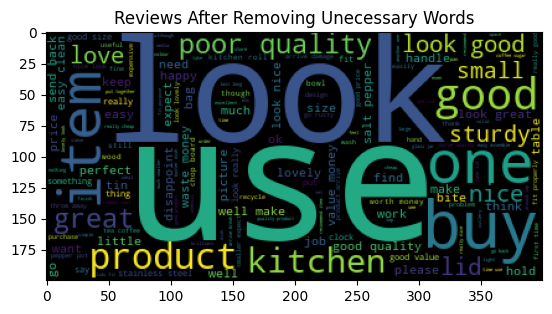

In [437]:
cleaned_joined_reviews=' '.join(X_resampled['review_text'])
plt.imshow(wc.generate(cleaned_joined_reviews))
plt.title('Reviews After Removing Unecessary Words')
plt.show()

In [438]:
XX=X_resampled['review_text']

# Converting Text into Vectors

In [439]:
cv=TfidfVectorizer()
cv.fit(XX)
X_vector=cv.transform(XX)

In [440]:
print(X_vector)

  (0, 3125)	0.39098595593881785
  (0, 1968)	0.25202426516316995
  (0, 1301)	0.24654875343832158
  (0, 1071)	0.4233140397436116
  (0, 763)	0.3490747999049554
  (0, 602)	0.4592273249888567
  (0, 63)	0.4592273249888567
  (1, 3074)	0.6048812635340052
  (1, 1558)	0.3878660375300664
  (1, 231)	0.6954700525229183
  (2, 3301)	0.25796674362541105
  (2, 2983)	0.5475431507903502
  (2, 2961)	0.36527989355597273
  (2, 1951)	0.3435625915294637
  (2, 1111)	0.3846154780803826
  (2, 601)	0.48399993418612375
  (3, 3314)	0.18714011796782165
  (3, 3043)	0.18032386712141663
  (3, 2979)	0.17714791283549747
  (3, 2872)	0.234018191016457
  (3, 2657)	0.13571949715494344
  (3, 2531)	0.18599899952900725
  (3, 2419)	0.13298954229538068
  (3, 2366)	0.17587209871082377
  (3, 2296)	0.1223172063045219
  :	:
  (5135, 196)	0.22366006477274378
  (5135, 102)	0.31592658794139306
  (5136, 3423)	0.2842125648485405
  (5136, 2218)	0.48617544652811484
  (5136, 2069)	0.40101231664130943
  (5136, 1734)	0.19133287911853644
  (513

# Train Test Split

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X_vector, y_resampled, test_size=0.2, random_state=1)

# Logistic Regression Model Building

In [442]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [443]:
y_train_prediction=model.predict(X_train)
print('Accuracy score is: ',accuracy_score(y_train_prediction,y_train))

Accuracy score is:  0.9639902676399027


In [444]:
y_test_prediction=model.predict(X_test)
print('Accuracy score is: ',accuracy_score(y_test_prediction,y_test))

Accuracy score is:  0.9455252918287937


# SVM Model Building

In [445]:
svm_model=LinearSVC()
svm_model.fit(X_train,y_train)

C:\Users\Premier UK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [446]:
svm_train_pred=svm_model.predict(X_train)
print('Accuracy score is: ',accuracy_score(svm_train_pred,y_train))

Accuracy score is:  0.9912408759124087


In [447]:
svm_test_pred=svm_model.predict(X_test)
print('Accuracy score is :',accuracy_score(svm_test_pred,y_test))

Accuracy score is : 0.9630350194552529


In [207]:
# input_text=X_test[196]
# pred=model.predict(input_text)
# if pred[0] == 1:
#     print("good review")
# else:
#     print("bad review")

good review


In [448]:
XX[5134]

'really struggle remove lid especially pepper pop process cut bruise right hand index finger would make difficult clean refill although look nice disappoint quality ease use'

In [449]:
print(X_test[105])

  (0, 2773)	0.608936753989172
  (0, 1576)	0.5723294039343126
  (0, 1028)	0.5492131489989339


In [450]:
y_resampled[99]

0

In [451]:
X_resampled[X_resampled['cust_rating']<3].tail(10)

,product_image,product_title,asin,product_rating,product_store,customer_name,review_title,review_date,review_text,product_url,cust_rating
5128,https://m.media-amazon.com/images/I/81h-bqXf5v...,Premier Housewares Storage Box With Lid Dog Fo...,B01DDM96NS,4.3,Premier Store,Zoe Chivers,1.0 out of 5 stars\nLid doesn't fit securely,30 May 2020,flimsy lid fit properly definitely keep food f...,https://www.amazon.co.uk/Premier-Housewares-Ad...,1.0
5129,https://m.media-amazon.com/images/I/816mUbqXdi...,Premier Housewares Acacia Wood Salad Bowl Larg...,B004IZ20MO,4.6,Premier Store,Michael Christie,2.0 out of 5 stars\nLighter and smaller than i...,20 November 2021,actually relatively small lightweight bowl qui...,https://www.amazon.co.uk/Premier-Housewares-Ac...,2.0
5130,https://m.media-amazon.com/images/I/81SKbKcsTl...,Premier Housewares Swiss Cutlery Set - 16-Piec...,B005OYRZNC,4.1,Premier Store,Brunogn,2.0 out of 5 stars\nso not the best design.,20 August 2015,unfortunately universal cut edge leave handers...,https://www.amazon.co.uk/Premier-Housewares-Sw...,2.0
5131,https://m.media-amazon.com/images/I/81MCKx0tZz...,Premier Housewares 2 Tier Dish Drying Rack | C...,B006B4UN0Q,4.1,Premier Store,Ben,"1.0 out of 5 stars\nToo lightweight, rust afte...",10 February 2017,lightweight top shelf full plat go top heavy a...,https://www.amazon.co.uk/Premier-Housewares-2-...,1.0
5132,https://m.media-amazon.com/images/I/81MCKx0tZz...,Premier Housewares 2 Tier Dish Drying Rack | C...,B006B4UN0Q,4.1,Premier Store,CRLondon,1.0 out of 5 stars\nAn accident waiting to happen,3 January 2016,silly buy despite older poor review recent one...,https://www.amazon.co.uk/Premier-Housewares-2-...,1.0
5133,https://m.media-amazon.com/images/I/61Cniubpbb...,Premier Housewares Liberty Biscuit Canister - ...,B001UNP9G6,4.3,Premier Store,GrumpyGit,2.0 out of 5 stars\nRubbish,3 December 2017,look dirty shoddy quality even wash black stai...,https://www.amazon.co.uk/Premier-Housewares-Li...,2.0
5134,https://m.media-amazon.com/images/I/81T3J7zqVv...,Premier Housewares 508549 Liberty Salt and Pep...,B001NIDYWO,4.2,Premier Store,Pauline 27,2.0 out of 5 stars\nDifficult to open,16 August 2019,really struggle remove lid especially pepper p...,https://www.amazon.co.uk/Premier-Housewares-Li...,2.0
5135,https://m.media-amazon.com/images/I/71nGmsBDBe...,Premier Housewares 1103933 Chopping Board with...,B008VB2N2I,4.5,Premier Store,T.FM,"2.0 out of 5 stars\nAdequate, but poorly finis...",12 February 2017,ok weeks wood start splinter corner edge proba...,https://www.amazon.co.uk/Premier-Housewares-Ch...,2.0
5136,https://m.media-amazon.com/images/I/714ABqjUX9...,Premier Housewares Vintage Home Butter Dish (C...,B0052R6GH2,4.4,Premier Store,Alan Priestley,2.0 out of 5 stars\nCracked,4 August 2023,arrive crack across plate look well otherwise,https://www.amazon.co.uk/Premier-Housewares-Vi...,2.0
5137,https://m.media-amazon.com/images/I/81aX4BZdQT...,Premier Housewares Coffee Tea Sugar Set Stainl...,B00YHRTJFE,4.2,Premier Store,Jade Wainwright,1.0 out of 5 stars\nDamages,10 September 2020,bring set however sugar canister bottom pop pa...,https://www.amazon.co.uk/Premier-Housewares-St...,1.0


# Logistic Regression Model Testing

In [463]:
input_text="poor"
input_data=cv.transform([input_text])
pred=model.predict(input_data)
if pred[0] == 1:
    print("good review")
else:
    print("bad review")

bad review


# SVM Model Testing

In [464]:
input_text="flimsy"
input_data=text_clean(input_text)
#print(input_data)

input_data1=cv.transform([input_data])
pred=svm_model.predict(input_data1)
#print(pred)
if pred[0] == 1:
    print("good review")
else:
    print("bad review")

bad review
